In [1]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%pylab inline

aisles = pd.read_csv("aisles.csv")
orders = pd.read_csv("orders.csv")
departments = pd.read_csv("departments.csv")
products = pd.read_csv("products.csv")
orders_products = pd.read_csv("order_products__train.csv")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=orders.merge(orders_products,left_on='order_id',right_on='order_id')
df1=df.merge(products,left_on='product_id',right_on='product_id')
df2=df1.merge(aisles,left_on='aisle_id',right_on='aisle_id')
df3=df2.merge(departments,left_on='department_id',right_on='department_id')
df4 = df3.drop(columns='eval_set',axis=1)
df4.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,2757217,67,25,0,11,5.0,196,1,1,Soda,77,7,soft drinks,beverages
2,632715,676,12,0,13,26.0,196,2,1,Soda,77,7,soft drinks,beverages
3,1167274,760,5,4,10,8.0,196,2,1,Soda,77,7,soft drinks,beverages
4,3347074,804,16,3,21,5.0,196,4,0,Soda,77,7,soft drinks,beverages


## The most popular aisle, department, and product  

Text(0.5,1,'Frequency of orders by department')

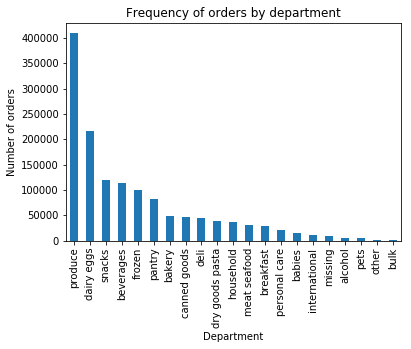

In [3]:
df4['department'].value_counts().plot(kind='bar')
xlabel('Department')
ylabel('Number of orders')
title('Frequency of orders by department')

Text(0.5,1,'Top 20 products ordered')

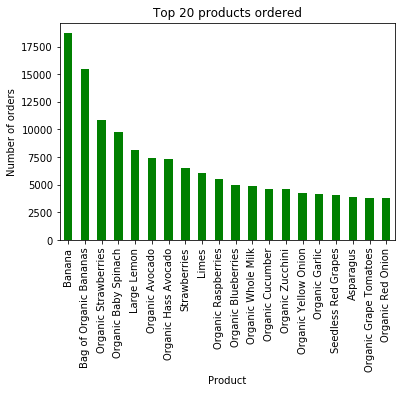

In [4]:
# Plot top 20 products ordered
df4.groupby(['product_name'])['order_id'].count().sort_values(ascending = False)[:20].plot(kind = 'bar',color='green')
xlabel('Product')
ylabel('Number of orders')
title('Top 20 products ordered')

Text(0.5,1,'Frequency of orders by aisle')

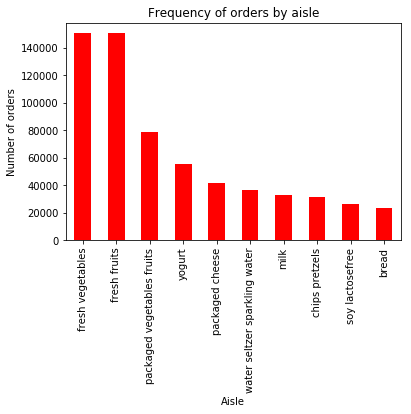

In [5]:
mask = (df3['aisle']!='missing')
non_missing_aisle = df3[mask]
non_missing_aisle['aisle'].nunique() # 133 aisles 
non_missing_aisle['aisle'].value_counts()[:10].plot(kind="bar", color='red') # the most popular aisle 
xlabel('Aisle')
ylabel('Number of orders')
title('Frequency of orders by aisle')

### Organic vs Non-organic Produce

Text(0,0.5,'Fraction of Total Purchases')

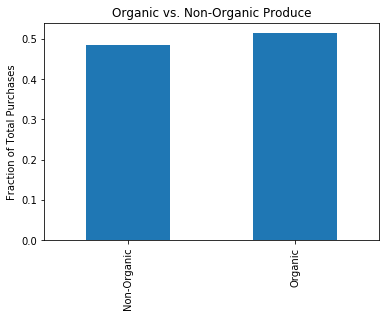

In [6]:
produce = df3[df3['department']=='produce']
def is_organic(x):
    phrase = x.lower().split() 
    return 'organic' in phrase
mask_produce = produce['product_name'].map(is_organic)

# Compare percentages for organic and non-organic purchases
percent_organic = len(produce[mask_produce])*1.0/len(produce)
percent_nonorganic = len(produce[~mask_produce])*1.0/len(produce)
produce_percent=DataFrame({'Organic':percent_organic,'Non-Organic':percent_nonorganic},index=[0])
produce_percent.T.plot(kind='bar',legend=False)
title('Organic vs. Non-Organic Produce')
ylabel('Fraction of Total Purchases')

Text(0,0.5,'Number Purchased')

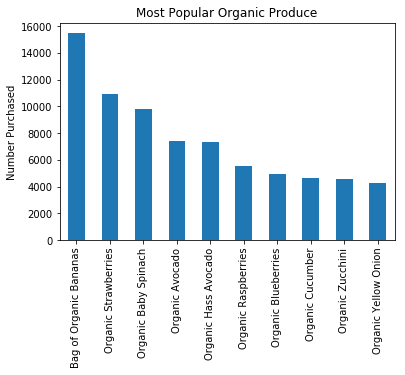

In [7]:
produce[mask_produce]['product_name'].value_counts()[:10].plot(kind='bar')
title('Most Popular Organic Produce')
ylabel('Number Purchased')

Text(0,0.5,'Number Purchased')

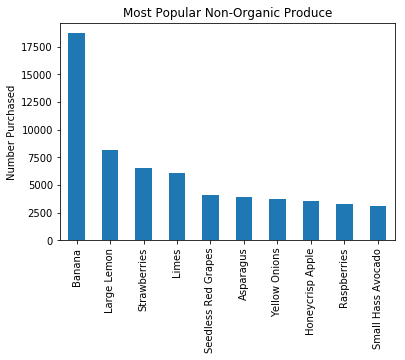

In [8]:
# Plot Non-Organic Produce
produce[~mask_produce]['product_name'].value_counts()[:10].plot(kind='bar')
title('Most Popular Non-Organic Produce')
ylabel('Number Purchased')

### Exploration of day by day purchases for select items

[Text(0,0,'Saturday'),
 Text(0,0,'Sunday'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday')]

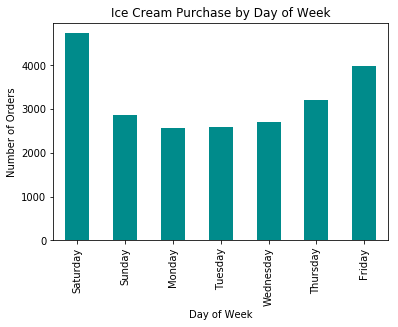

In [9]:
# Find most popular ice creams
ice_cream_mask = df4['aisle']=='ice cream ice'
ice_cream = df4[ice_cream_mask]

# When do people buy different types of ice cream
ice_cream_hours = pd.crosstab(index=ice_cream['product_name'],columns=ice_cream['order_hour_of_day'])

# Days of the week people buy ice cream
ax1 = ice_cream['order_dow'].value_counts(sort=False).plot(kind='bar', color = 'darkcyan')
xlabel('Day of Week')
ylabel('Number of Orders')
title('Ice Cream Purchase by Day of Week')
ax1.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

[Text(0,0,'Saturday'),
 Text(0,0,'Sunday'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday')]

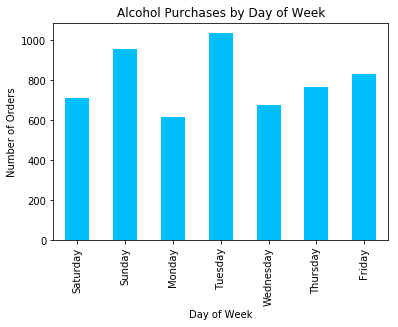

In [10]:
alcohol_mask = df3['department']=='alcohol'
alcohol = df3[alcohol_mask]
alcohol['product_name'].value_counts()[:10]
# Days of the week people buy ice cream
ax2 = alcohol['order_dow'].value_counts(sort=False).plot(kind='bar', color = 'deepskyblue')
xlabel('Day of Week')
ylabel('Number of Orders')
title('Alcohol Purchases by Day of Week')
ax2.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

### Most popular ordered products by hour of day and day of week

In [11]:
# Product most commonly ordered by hour
df6 = df4[['order_id','order_hour_of_day','product_name']]
pivoted = pd.pivot_table(df6, index = 'order_hour_of_day', columns='product_name', values = 'order_id',
                         aggfunc=size, fill_value=0)
#pivoted.T.idxmax().reset_index().head(20)


In [14]:
chart_data = pivoted.T.max().reset_index().merge(pivoted.T.idxmax().reset_index(),
                                                 left_on = 'order_hour_of_day',right_on = 'order_hour_of_day')
chart_data.head()

,order_hour_of_day,0_x,0_y
0,0,125,Bag of Organic Bananas
1,1,69,Banana
2,2,47,Banana
3,3,26,Bag of Organic Bananas
4,4,27,Banana


In [ ]:
chart_data['0_y'][2]

In [ ]:
# Product most commonly ordered by dow
pivoted2 = pd.pivot_table(df4[['order_id','order_dow','product_name']], 
                         index = 'order_dow', columns='product_name', values = 'order_id',
                         aggfunc=size, fill_value=0)
pivoted3 = pivoted2.T.idxmax().reset_index()
def weekdays(s):
    if s ==0:
        return 'Saturday'
    if s ==1:
        return 'Sunday'
    if s ==2:
        return 'Monday'
    if s ==3:
        return 'Tuesday'
    if s ==4:
        return 'Wednesday'
    if s ==5:
        return 'Thursday'
    if s ==6:
        return 'Friday'
    
pivoted3['order_dow'] = pivoted3['order_dow'].map(weekdays)
pivoted3

## Peak purchasing period

### Purchasing frequency by hour

In [ ]:
# Plot frequency of orders by hour of the day
orders.groupby(['order_hour_of_day'])['order_id'].count().plot(kind='bar', color = 'grey')
xlabel('Hour of day')
ylabel('Number of orders')
title('Frequency of orders by hour of day')


### Purchasing frequency by day of week

In [ ]:
# Plot the frequency of orders by day of week
ax3 = orders['order_dow'].value_counts().plot(kind='bar', color = 'maroon')
xlabel('Day of week')
ylabel('Number of orders')
title('Frequency of orders by day of week')
ax3.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

In [ ]:
# Frequency of orders by hours and day of week
# Check the day and time of the most number of orders
day_time = df4.groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index()
day_time = day_time.pivot('order_dow','order_hour_of_day','order_id')

fig, ax4 =plt.subplots(figsize=(7,6))
sns.heatmap(day_time, cmap="Blues").set_title('Frequency of orders by hours and day of week')
ax4.set_yticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], rotation=45)


### Number of Orders By Hour on Weekdays vs Weekends

In [ ]:
weekdays=orders[orders['order_dow']>1]
weekdays['order_hour_of_day'].value_counts(sort=False).plot(kind='bar', color = 'black')
title('Number of Orders By Hour on Weekdays')
xlabel('Hour of Day')
ylabel('Number of Orders')

In [ ]:
weekends=orders[orders['order_dow']<2]
weekends['order_hour_of_day'].value_counts(sort=False).plot(kind='bar', color = 'purple')
title('Number of Orders By Hour on Weekends')
xlabel('Hour of Day')
ylabel('Number of Orders')

### Frequency of orders by prior ordered

In [ ]:
# Plot frequency of orders by prior ordered
orders.groupby(['days_since_prior_order'])['order_id'].count().plot(kind='bar', color = 'teal')
xlabel('Days since prior order')
ylabel('Number of orders')
title('Frequency of orders by days since prior ordered')

## Customer Segmentation

In [ ]:
user_seg = df3[['user_id','order_number']]
user_seg=user_seg.drop_duplicates()
user_seg[['order_number']].describe()

In [ ]:
user_rare = user_seg['user_id'][user_seg['order_number']<6].drop_duplicates()
user_often = user_seg['user_id'][(user_seg['order_number']>=6) & (user_seg['order_number']<10)].drop_duplicates()
len(user_often) #33019
user_very_often = user_seg['user_id'][(user_seg['order_number']>=10) & (user_seg['order_number']<=20)].drop_duplicates()
len(user_very_often)#38086
user_most_freq = user_seg['user_id'][user_seg['order_number']>20].drop_duplicates()
len(user_most_freq) #32365
weather_data = {
	'user_rare (0~5)': [len(user_rare)],
	'user_often (6~9)':[len(user_often)],
	'user_very_often (10~20)': [len(user_very_often)],
	'user_most_freq (more than 21)':[len(user_most_freq)],
	'Customer Seg':['No. of customers']
}
data = pd.DataFrame(weather_data)
data
columnsTitles = ['user_rare (0~5)', 'user_often (6~9)', 'user_very_often (10~20)','user_most_freq (more than 21)',
           	'Customer Seg']
data = data.reindex(columns=columnsTitles)
data
data.set_index('Customer Seg')


## Reordering

In [ ]:
reordered = df4[['user_id','reordered']].drop_duplicates()
ax3 = reordered['reordered'].value_counts().plot(kind = 'bar', color = 'darkgreen')
ylabel('Number of orders')
title('Number of users that reordered vs number of user that did not reorder')
ax3.set_xticklabels(['Reordered','Ordered once'])

In [ ]:
# Products having most reordered goods
df4.pivot_table(index='department', columns='reordered', 
                values='order_id', aggfunc='sum').dropna().sort_values(by = 1, ascending = False).head(15).plot(kind='bar')
xlabel('Deparment')
ylabel('Number of reorders')
title('Number of reorders based on products in the top 20 departments')

In [ ]:
# Reorder count vs add to cart number
df4.groupby(['add_to_cart_order'])['reordered'].sum().sort_values(ascending = False).plot()
xlabel('Add to cart order')
ylabel('Number of reorders')
title('Reorder count vs add to cart number')

### Logistic Regression to classify whether an organic produce will be reordered 

In [ ]:
from patsy import dmatrices
df4 = df3[df3['department']=='produce']
organic = df4[df4['product_name'].str.contains('Organic')]
#organic.dropna(how='any',inplace=True)
len(organic)

formula = 'reordered ~ 0 + days_since_prior_order + order_number' + \
  ' +C(order_dow) + C(order_hour_of_day) +C(product_name)'
Y,X = dmatrices(formula, organic, return_type = 'dataframe')
y = Y['reordered'].values

dspo_vs_reorder = pd.crosstab(organic['days_since_prior_order'], organic['reordered'])
dspo_vs_reorder
total_reorder = dspo_vs_reorder.apply(sum)
total_reorder

ohod_vs_reorder = pd.crosstab(organic['order_hour_of_day'], organic['reordered'])
ohod_vs_reorder.plot(kind='bar')
xlabel('Hour of day')
ylabel('Number of reorders')
title('Number of reorders based on hour of day')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
print "Train accuracy score is "+str(metrics.accuracy_score(y_train, prediction_train)*100.0)+"%"
prediction = model.predict(X_test)
print "Test accuracy score is "+str(metrics.accuracy_score(y_test, prediction)*100.0)+"%"
negative_example_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)
1-negative_example_in_test * 1.0/total_examples_in_test
model.coef_
weights = Series(model.coef_[0],index= X.columns.values)
print "The top 5 products which have most importance"
weights.sort_values()[:5]
